In [71]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris, load_wine
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

- 3D Scatter plot

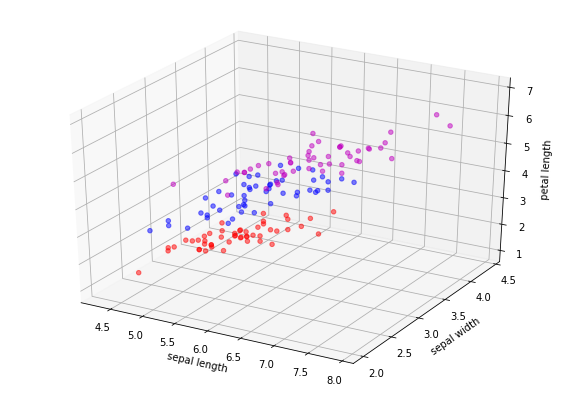

In [26]:
iris  = load_iris()
df    = pd.DataFrame( iris.data, columns=iris.feature_names )

color = []
for n in iris.target:
    if n == 0:
        color.append('r')
    elif n == 1:
        color.append('b')
    else:
        color.append('m')
        
fig = plt.figure(figsize=(10,7))
ax  = fig.gca( projection='3d' )
ax.scatter( df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'], alpha=0.5, c=color )
ax.set_xlabel('sepal length') ; ax.set_ylabel('sepal width ') ; ax.set_zlabel('petal length') 
plt.show()

- PCA(Principal Component Analysis)

In [36]:
model = PCA( n_components=2 )           # 2차원으로 차원 축소.
pcaf  = model.fit_transform( iris.data )
pcaf.shape

(150, 2)

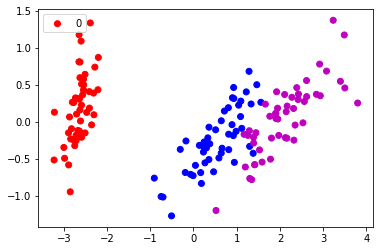

In [67]:
plt.scatter( pcaf[:,0], pcaf[:,1], c=color )
plt.show()

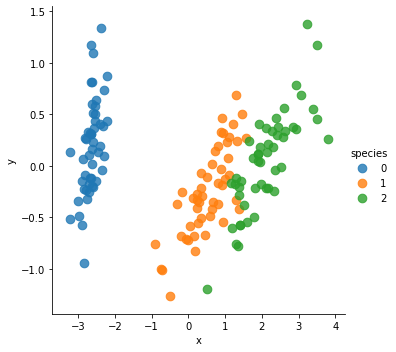

In [55]:
pca_df = pd.DataFrame( pcaf, columns=['x','y'] )
pca_df['species'] = iris.target
sb.lmplot( x='x', y='y', data=pca_df, fit_reg=False, hue='species', scatter_kws={'s':75} ) 
plt.show()

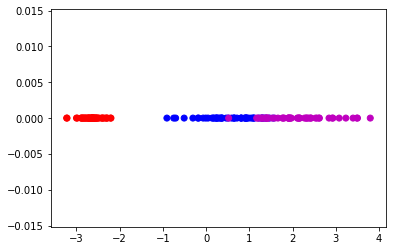

In [70]:
model = PCA( n_components=1 )              # 1차원으로 차원 축소.
pcaf1 = model.fit_transform( iris.data )
plt.scatter( pcaf1, len(pcaf1)*[0], c=color )
plt.show()

- wine data set을 2차원으로 차원축소 후 분류를 확인하시오.

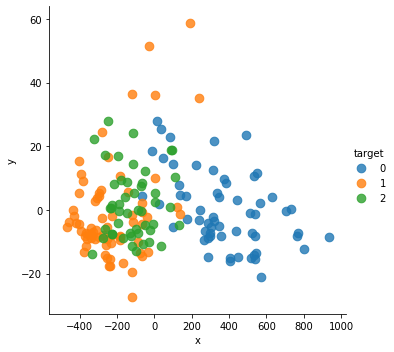

In [107]:
wine   = load_wine()
model  = PCA( n_components=2 )               # 2차원으로 차원 축소.
pca    = model.fit_transform( wine.data )
df     = pd.DataFrame( pca, columns=['x','y'] )
df['target'] = wine.target
sb.lmplot( x='x', y='y', data=df, fit_reg=False, hue='target', scatter_kws={'s':75} ) 
plt.show()

In [104]:
pca[0]

array([318.56297929,  21.49213073])

In [83]:
model.inverse_transform([ 3.18562979e+02,  2.14921307e+01])

array([1.35550621e+01, 2.16571712e+00, 2.52733485e+00, 1.85753157e+01,
       1.26911695e+02, 2.62930473e+00, 2.52743531e+00, 2.93532441e-01,
       1.88978551e+00, 6.12397031e+00, 9.95653303e-01, 2.76112769e+00,
       1.06501783e+03])

In [105]:
wine.data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [100]:
model.transform(  [wine.data[0]] )

array([[318.56297929,  21.49213073]])